# Monte Carlo Simulation

**1. Simulering av pasientstrøm og belegg (Monte Carlo simulering)**<br>
<br>
**Formål**: Simulere variasjonen i antall pasienter og belegg på avdelingen.<br>
**Hvordan**: Du kan bruke Monte Carlo-simulering for å modellere usikkerhet i pasientankomster og oppholdstid. Dette innebærer å generere et stort antall scenarier basert på historisk data, og beregne sannsynligheten for at avdelingen blir full eller overfylt.<br>
**Resultat**: Estimere risikoen for overbelastning og evaluere hvor ofte det kan oppstå situasjoner med kapasitetsmangel.<br>

## Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Input data

In [7]:
days_in_year = 365
total_beds = 26  
arrival_rate = 4 # Poisson
average_stay = 10 # Normal
num_simulations = 1000 

## Monte Carlo 

**Formål**: Simulere hvordan variasjon i antall pasientankomster og gjennomsnittlig liggetid påvirker sannsynligheten for overbelastning.<br>
<br>
**Nødvendig data**:<br>
<br>
1. Antall pasientankomster per dag (gjennomsnittlig eller historisk fordeling).<br>
2. Gjennomsnittlig liggetid per pasient.<br>
3. Totalt antall senger på avdelingen.<br>

In [13]:
def monte_carlo_simulation(days_in_year, total_beds, arrival_rate, average_stay, num_simulations):

    total_bed_occupancy_overall = 0
    total_overloaded_days = 0
    total_patients_waiting = 0
    total_patients_admitted = 0
    
    # For visualiseringen
    all_overload_days = [] 
    all_occupancy_percents = []
    
    for sim in range(num_simulations):
        beds_occupied = []
        daily_overload = 0  # dager med overbelastning
        bed_occupancy = 0   # belegget
        
        # For visualiseringer
        if sim == 0:  
            daily_occupancy_record = []  
        
        
        for day in range(days_in_year):
            beds_occupied = [stay for stay in beds_occupied if stay > day] # Oppdater senger
            new_patients = np.random.poisson(arrival_rate) # Poisson
            total_patients_admitted += new_patients

            overload_today = False

            # Sjekk om det er en ledig seng
            for _ in range(new_patients):
                if len(beds_occupied) < total_beds:

                    # Tildel en seng og definer hvor lenge de vil ligge inne
                    stay_duration = max(1, int(np.random.normal(average_stay, 2)))  # Normalfordeling
                    beds_occupied.append(day + stay_duration)
                else:
                    # Overbelastning, pasient må vente
                    overload_today = True
                    total_patients_waiting += 1
            if overload_today:
                daily_overload += 1
            
            bed_occupancy += len(beds_occupied) / total_beds

            if sim == 0:
                daily_occupancy_record.append(len(beds_occupied) / total_beds)

        total_overloaded_days += daily_overload
        total_bed_occupancy_overall += bed_occupancy / days_in_year
        all_overload_days.append(daily_overload)
        
        if sim == 0:
            all_occupancy_percents = daily_occupancy_record

    # Beregn gjennomsnittlig overbelastning, beleggsprosent og sannsynlighet
    avg_overload_days = total_overloaded_days / num_simulations
    avg_occupancy_percentage = (total_bed_occupancy_overall / num_simulations) * 100
    waiting_probability = total_patients_waiting / total_patients_admitted
    
    return avg_overload_days, avg_occupancy_percentage, waiting_probability, all_overload_days, all_occupancy_percents

# Kjør Monte Carlo-simuleringen
avg_overload_days, avg_occupancy_percentage, waiting_probability, all_overload_days, all_occupancy_percents = monte_carlo_simulation(
    days_in_year, total_beds, arrival_rate, average_stay, num_simulations)

# Print resultater
print(f"Gjennomsnittlig antall dager med overbelastning per år: {avg_overload_days:.2f} dager")
print(f"Gjennomsnittlig beleggsprosent over året: {avg_occupancy_percentage:.2f}%")
print(f"Sannsynligheten for at pasienter må vente på en seng: {waiting_probability:.2%}")


Gjennomsnittlig antall dager med overbelastning per år: 179.49 dager
Gjennomsnittlig beleggsprosent over året: 95.68%
Sannsynligheten for at pasienter må vente på en seng: 33.72%


## Resultat

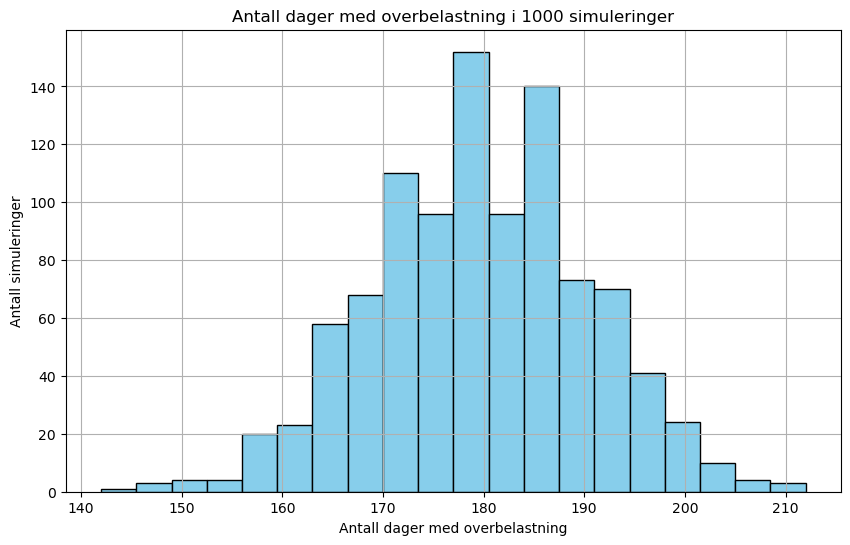

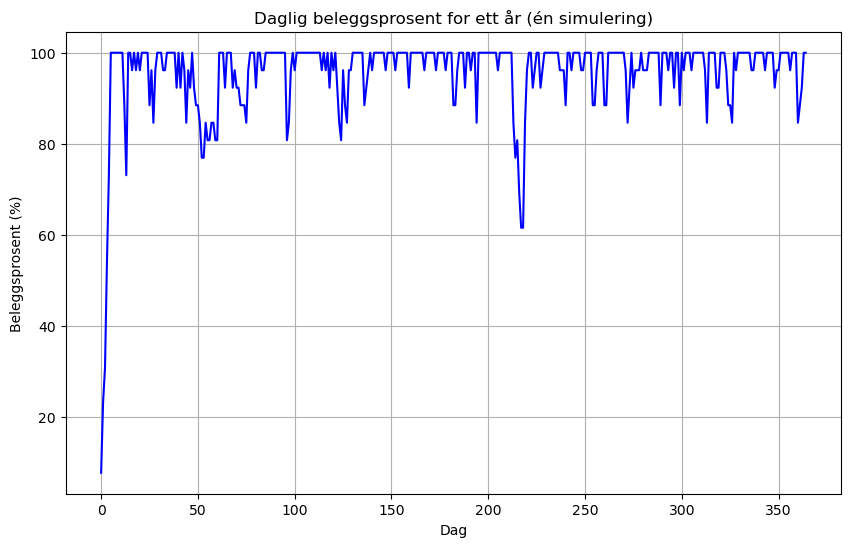

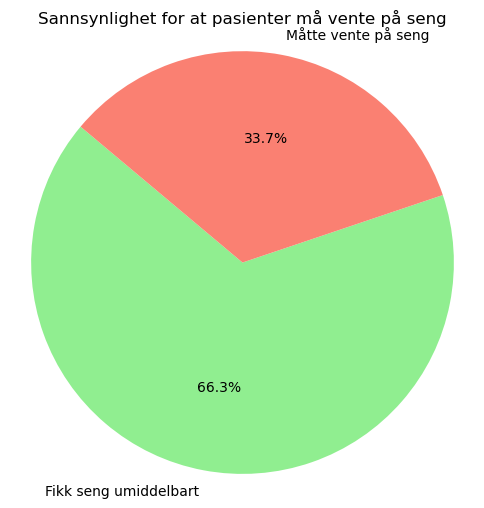

In [14]:
# 1. antall dager med overbelastning
plt.figure(figsize=(10, 6))
plt.hist(all_overload_days, bins=20, color='skyblue', edgecolor='black')
plt.title('Antall dager med overbelastning i 1000 simuleringer')
plt.xlabel('Antall dager med overbelastning')
plt.ylabel('Antall simuleringer')
plt.grid(True)
plt.show()

# 2. daglig beleggsprosent for én simulering (visualisere årets belastning)
plt.figure(figsize=(10, 6))
plt.plot(range(days_in_year), np.array(all_occupancy_percents) * 100, color='blue')
plt.title('Daglig beleggsprosent for ett år (én simulering)')
plt.xlabel('Dag')
plt.ylabel('Beleggsprosent (%)')
plt.grid(True)
plt.show()

# 3. sannsynlighet for at pasienter må vente på seng
plt.figure(figsize=(6, 6))
labels = ['Fikk seng umiddelbart', 'Måtte vente på seng']
sizes = [1 - waiting_probability, waiting_probability]
colors = ['lightgreen', 'salmon']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sannsynlighet for at pasienter må vente på seng')
plt.axis('equal')
plt.show()

**Verdi for sykehuset**:<br>
<br>
1. Identifisere risiko for overbelastning.<br>
2. Finne sannsynligheten for at kapasiteten blir overskredet, slik at bemanningsplaner eller kapasiteten kan justeres.<br>